In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_excel('Online_Retail.xlsx')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
#data Cleaning
import calendar

df["CustomeID"] = df["CustomerID"].fillna(0)
df["CustomerID"] = df["CustomerID"].astype(str)
df["CustomerID"] = df["CustomerID"].replace('0','Guest Customer')



In [ ]:
df['Date'] = df['InvoiceDate'].dt.date
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['Month'].apply(lambda x: calendar.month_name[int(x)])
df['Week of the Year'] = df['InvoiceDate'].dt.isocalendar().week
df['Day of Week'] = df['InvoiceDate'].dt.day_name()
df['Time'] = df['InvoiceDate'].dt.time
df["Hour"] = df['InvoiceDate'].dt.hour
df['Time of Day']=pd.cut(df['InvoiceDate'].dt.hour,[0,6,12,18,23],labels=['Night','Morning','Afternoon','Evening'],include_lowest=True)
index_names = df[df['Year'] == 2010].index
df.drop(index_names, inplace = True)
df.drop('Year', axis=1, inplace=True)


In [ ]:
#cancelled orders
df['InvoiceNo'] = df['InvoiceNo'].dropna()

#Sales Revenue
df['Sales Revenue'] = df['UnitPrice'] * df['Quantity']

#"Unspecified" country
df.drop(df[df["Country"] == "Unspecified"].index, inplace = True)

###drop row where the quantity and sales revenue that is less than 0 and drop duplicated rows if any
index_names = df[df['Quantity'] <= 0].index
df.drop(index_names, inplace = True)
index_names = df[df['Sales Revenue'] <= 0].index
df.drop(index_names, inplace = True)
df.drop_duplicates(inplace = True)

#from the Description column
df.dropna(subset = ['Description'], inplace= True)
#removing the descriptions with length less than or equal to 8 characters
df.drop(df[df.Description.str.len() <= 8].index, inplace=True)
#we are going to drop this special case row with description '20713' at index '417090'
df.drop(df.index[417090], inplace=True)
#the description to lower case
df.Description = df.Description.str.lower()
#we are also going to remove the row that have description value "dotcom postage"
index_names = df[ df['Description'] == "dotcom postage" ].index
df.Description = df.Description.str.upper()
df["Description"] = df["Description"].str.strip()
df.drop(index_names, inplace = True)
#duplicated product description
the_dict = dict()
df.reset_index(drop=True, inplace=True)
for i, code in enumerate(df["StockCode"]):
    if code not in the_dict:
        the_dict[code] = list()
    if df["Description"][i] not in the_dict[code]:
        the_dict[code].append(df["Description"][i])

dict_to_look_at = dict()
for key in the_dict:
    if len(the_dict[key]) > 1:
        dict_to_look_at[key] = the_dict[key]

key_list = list(dict_to_look_at.keys())
for key_l in key_list:
    x = dict_to_look_at[key_l]
    max_len = 0
    index = 0
    for i in range(len(x)):
        if len((x[i]).split()) >= max_len:
            max_len = len((x[i]).split())
            index = i
    dict_to_look_at[key_l] = x[index]

for key in dict_to_look_at:
    df.loc[df["StockCode"] == key, "Description"] = dict_to_look_at[key]

In [ ]:
df.shape

(481313, 17)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomeID,Date,Month,Week of the Year,Day of Week,Time,Hour,Time of Day,Sales Revenue
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,13313.0,2011-01-04,January,1,Tuesday,10:00:00,10,Morning,19.5
1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,13313.0,2011-01-04,January,1,Tuesday,10:00:00,10,Morning,10.5
2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,13313.0,2011-01-04,January,1,Tuesday,10:00:00,10,Morning,10.5
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,13313.0,2011-01-04,January,1,Tuesday,10:00:00,10,Morning,10.5
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,13313.0,2011-01-04,January,1,Tuesday,10:00:00,10,Morning,12.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481313 entries, 0 to 481312
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         481313 non-null  object        
 1   StockCode         481313 non-null  object        
 2   Description       481313 non-null  object        
 3   Quantity          481313 non-null  int64         
 4   InvoiceDate       481313 non-null  datetime64[ns]
 5   UnitPrice         481313 non-null  float64       
 6   CustomerID        481313 non-null  object        
 7   Country           481313 non-null  object        
 8   CustomeID         481313 non-null  float64       
 9   Date              481313 non-null  object        
 10  Month             481313 non-null  object        
 11  Week of the Year  481313 non-null  UInt32        
 12  Day of Week       481313 non-null  object        
 13  Time              481313 non-null  object        
 14  Hour

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomeID,Week of the Year,Hour,Sales Revenue
count,481313.00000,481313.000000,481313.000000,481313.0,481313.000000,481313.000000
mean,10.80504,3.252614,11598.696110,29.164677,13.066221,19.693793
std,162.79915,16.522079,6701.489951,14.743237,2.448566,280.999991
min,1.00000,0.001000,0.000000,1.0,6.000000,0.001000
25%,1.00000,1.250000,12420.000000,16.0,11.000000,3.900000
50%,4.00000,2.080000,14407.000000,31.0,13.000000,9.950000
75%,12.00000,4.130000,16265.000000,43.0,15.000000,17.700000
max,80995.00000,11062.060000,18287.000000,49.0,20.000000,168469.600000


In [ ]:
from operator import index

df.head(15).to_csv("df_head.csv", index=False)

In [ ]:
def group_Quantity_and_SalesRevenue(df,string):
    df  = df[[f'{string}','Quantity','Sales Revenue']].groupby([f'{string}']).sum().sort_values(by= 'Sales Revenue', ascending = False).reset_index()
    return df


In [ ]:
import plotly.io as pio
import plotly.express as px

Country_Data = df.groupby("Country")["InvoiceNo"].nunique().sort_values(ascending = False).reset_index().head(10)
fig = px.bar(Country_Data, x = "InvoiceNo", y = 'Country',title = "Top 10 Number of order per country including uk")
pio.show(fig,height=700,width=1000)

In [ ]:
temp_df = group_Quantity_and_SalesRevenue(df,'Country')

fig = px.bar(temp_df, x= "Quantity", y='Country', title= "Quantity of orders per country with the UK")
pio.show(fig, height=700, width=1000)

In [ ]:
temp_df = group_Quantity_and_SalesRevenue(df,'Country')

fig = px.bar(temp_df[temp_df['Country'] != "United Kingdom"], x= "Quantity", y='Country', title= "Quantity of orders per country without the UK")
pio.show(fig, height=700, width=1000)


In [ ]:
temp_df = group_Quantity_and_SalesRevenue(df,'Country')

fig = px.bar(temp_df, x= "Sales Revenue", y='Country', title= "Sales Revenue of orders per country with the UK")
pio.show(fig, height=700, width=1000)

In [ ]:
temp_df = group_Quantity_and_SalesRevenue(df,'Country')

fig = px.bar(temp_df[temp_df['Country'] != "United Kingdom"], x= "Sales Revenue", y='Country', title= "Sales Revenue of orders per country without the UK")
pio.show(fig, height=700, width=1000)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def wordcloud_of_Description(df, title):
    plt.rcParams["figure.figsize"] = (20,20)
    tuples = [tuple(x) for x in df.values]
    wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title)
    plt.show()

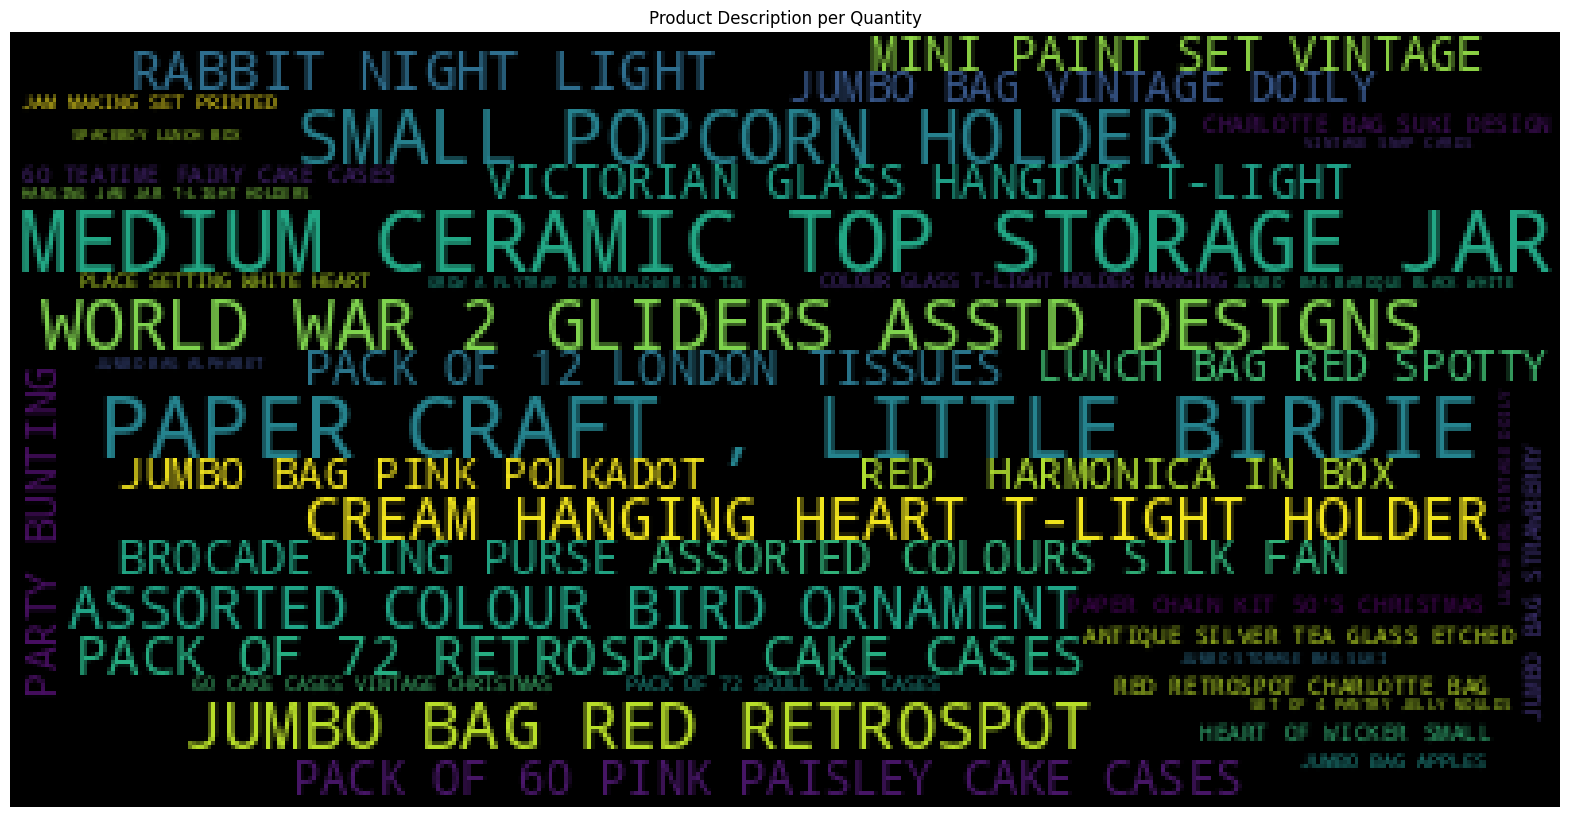

In [ ]:
temp_df = pd.DataFrame(df.groupby('Description')['Quantity'].sum()).reset_index()
title = "Product Description per Quantity"
wordcloud_of_Description(temp_df, title)

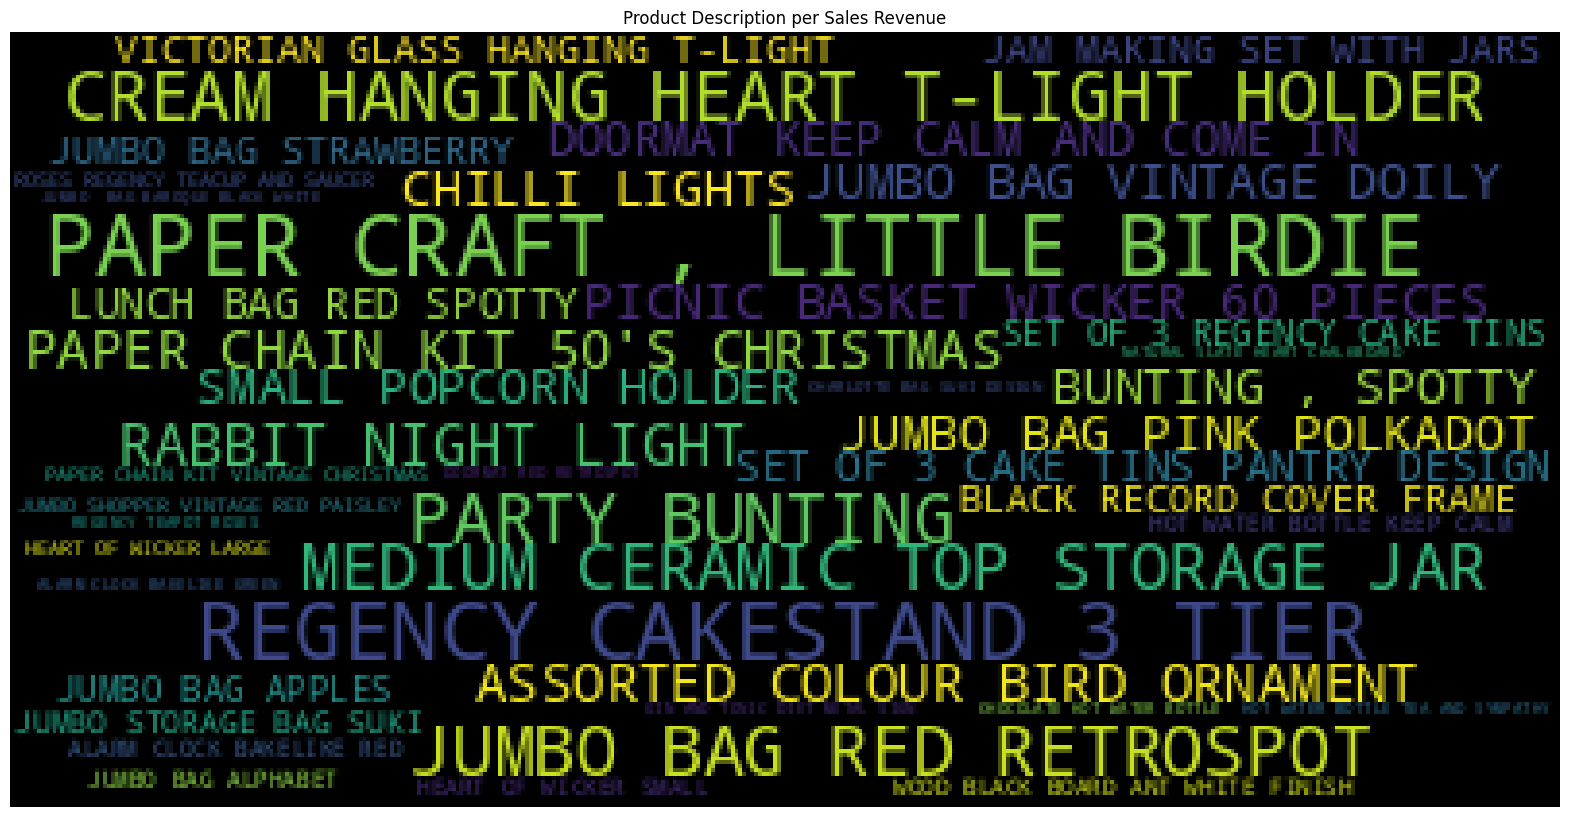

In [ ]:
temp_df = pd.DataFrame(df.groupby('Description')['Sales Revenue'].sum()).reset_index()
title = "Product Description per Sales Revenue"
wordcloud_of_Description(temp_df, title)

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

temp_df = group_Quantity_and_SalesRevenue(df,'Month')
fig = make_subplots(rows=1, cols=2, shared_yaxes=False,
                  subplot_titles=("Quantity", "Sales Revenue")
                  )

fig.add_trace(go.Bar(x=temp_df['Month'], y=temp_df['Quantity'],name = 'Quantity'),1, 1)

fig.add_trace(go.Bar(x=temp_df['Month'], y=temp_df['Sales Revenue'],name = 'Sales Revenue'),1, 2)

fig.update_layout(showlegend=False, title_text="Monthly Sales Revenue and Quantity")
pio.show(fig, height=700, width=1200)

In [ ]:
fig = make_subplots(rows=1, cols=2,
                    specs=[[{"type": "pie"}, {"type": "pie"}]],
                    subplot_titles=("Quantity per Month", "Sales Revenue per Month")
                    )
fig.add_trace(
    go.Pie(values = temp_df['Quantity'], labels = temp_df['Month'],
    name = 'Quantity'),
    row=1, col=1
)
fig.add_trace(
    go.Pie(values = temp_df['Sales Revenue'], labels = temp_df['Month'],
    name = 'Sales Revenue'),
    row=1, col=2
)
fig.update_layout(title_text="Percentage pie charts for Monthly Sales Revanue and Quantity")

pio.show(fig, height=700, width=1200)

In [ ]:
temp_df = group_Quantity_and_SalesRevenue(df,'Week of the Year')
fig = make_subplots(rows=1, cols=2, shared_yaxes=False,
                  subplot_titles=("Quantity", "Sales Revenue")
                        )

fig.add_trace(go.Bar(x=temp_df['Week of the Year'], y=temp_df['Quantity'],name = 'Quantity'),1, 1)

fig.add_trace(go.Bar(x=temp_df['Week of the Year'], y=temp_df['Sales Revenue'],name = 'Sales Revenue'),1, 2)

fig.update_layout(showlegend=False, title_text="Weekly Sales Revenue and Quantity")
pio.show(fig, height=700, width=1200)

In [ ]:
temp_df = group_Quantity_and_SalesRevenue(df,'Day of Week')
fig = make_subplots(rows=1, cols=2, shared_yaxes=False,
                  subplot_titles=("Quantity", "Sales Revenue")
                        )

fig.add_trace(go.Bar(x=temp_df['Day of Week'], y=temp_df['Quantity'],name = 'Quantity'),1, 1)

fig.add_trace(go.Bar(x=temp_df['Day of Week'], y=temp_df['Sales Revenue'],name = 'Sales Revenue'),1, 2)

fig.update_layout(coloraxis=dict(colorscale='Greys'), showlegend=False, title_text="Day of the Week Sales Revenue and Quantity")
pio.show(fig, height=700, width=1200)

In [ ]:
fig = make_subplots(rows=1, cols=2,
                    specs=[[{"type": "pie"}, {"type": "pie"}]],
                    subplot_titles=("Quantity", "Sales Revenue")
                    )

fig.add_trace(
    go.Pie(values = temp_df['Quantity'], labels = temp_df['Day of Week'],
    name = 'Quantity'),
    row=1, col=1
)
fig.add_trace(
    go.Pie(values = temp_df['Sales Revenue'], labels = temp_df['Day of Week'],
    name = 'Sales Revenue'),
    row=1, col=2
)
fig.update_layout(title_text="Percentage pie charts for Day of the Week Sales Revenue and Quantity")

pio.show(fig, height=700, width=1200)

In [ ]:
#we can also look at the volume of Invoice Numbers hourly data
Hourly_Sales = (df.groupby('Hour').sum()["Quantity"]).reset_index()
fig = px.bar(Hourly_Sales, x='Hour', y='Quantity', title='Hourly Volume of quantity sold')
pio.show(fig, height=700, width=1000)

<ipython-input-29-03c3310445a2>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
#we can also look at the volume quantity sold hourly data
Hourly_Sales = (df.groupby('Hour').count()["InvoiceNo"]).reset_index()
fig = px.bar(Hourly_Sales, x='Hour', y='InvoiceNo', title='Hourly sale using the Invoice Numbers')
pio.show(fig, height=700, width=1000)

In [ ]:
def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))


from IPython.display import display, HTML

temp_df = group_Quantity_and_SalesRevenue(df, 'Description')
Quantity_tempA = temp_df.sort_values(ascending=False, by = "Quantity").head(10).reset_index(drop=True)
Quantity_tempB = temp_df.sort_values(ascending=False, by = "Quantity").tail(10).reset_index(drop=True)

Quantity_tempA.drop('Sales Revenue', axis=1, inplace=True)
Quantity_tempB.drop('Sales Revenue', axis=1, inplace=True)
display_side_by_side([Quantity_tempA, Quantity_tempB], ['Top 10 Description by Quantity\n', 'Bottom 10 Description by Quantity\n'])

,Description,Quantity
0,"PAPER CRAFT , LITTLE BIRDIE",80995
1,MEDIUM CERAMIC TOP STORAGE JAR,78033
2,SMALL POPCORN HOLDER,54158
3,WORLD WAR 2 GLIDERS ASSTD DESIGNS,49660
4,JUMBO BAG RED RETROSPOT,46220
5,ASSORTED COLOUR BIRD ORNAMENT,33977
6,CREAM HANGING HEART T-LIGHT HOLDER,33889
7,PACK OF 72 RETROSPOT CAKE CASES,32253
8,RABBIT NIGHT LIGHT,30726
9,MINI PAINT SET VINTAGE,23923


In [ ]:
fig = make_subplots(rows=1, cols=2, shared_yaxes=False,
                  subplot_titles=("Top 10 Product", "Bottom 10 Products")
                        )

fig.add_trace(go.Bar(x=Quantity_tempA['Description'], y=Quantity_tempA['Quantity'],name = 'Top10'),1, 1)

fig.add_trace(go.Bar(x=Quantity_tempB['Description'], y=Quantity_tempB['Quantity'],name = 'Bottom10'),1, 2)

fig.update_layout(showlegend=False, title_text="Product Description by Volume Quantity")
pio.show(fig, height=700, width=1200)

In [ ]:
Sales_Revenue_tempA = temp_df.sort_values(ascending=False, by = "Sales Revenue").head(10).reset_index(drop=True)
Sales_Revenue_tempB = temp_df.sort_values(ascending=False, by = "Sales Revenue").tail(10).reset_index(drop=True)

Sales_Revenue_tempA.drop('Quantity', axis=1, inplace=True)
Sales_Revenue_tempB.drop('Quantity', axis=1, inplace=True)
display_side_by_side([Sales_Revenue_tempA, Sales_Revenue_tempB], ['Top 10 Description by Sales Revenue\n', 'Bottom 10 Description by Sales Revenue\n'])

,Description,Sales Revenue
0,"PAPER CRAFT , LITTLE BIRDIE",168469.600000
1,REGENCY CAKESTAND 3 TIER,146436.280000
2,PARTY BUNTING,98237.490000
3,CREAM HANGING HEART T-LIGHT HOLDER,94027.390000
4,JUMBO BAG RED RETROSPOT,90140.660000
5,MEDIUM CERAMIC TOP STORAGE JAR,81700.920000
6,RABBIT NIGHT LIGHT,66842.990000
7,PAPER CHAIN KIT 50'S CHRISTMAS,55667.490000
8,ASSORTED COLOUR BIRD ORNAMENT,54918.090000
9,PICNIC BASKET WICKER 60 PIECES,50287.910000


In [ ]:
fig = make_subplots(rows=1, cols=2, shared_yaxes=False,
                  subplot_titles=("Top 10 Product", "Bottom 10 Products")
                        )

fig.add_trace(go.Bar(x=Sales_Revenue_tempA['Description'], y=Sales_Revenue_tempA['Sales Revenue'],name = 'Top10'),1, 1)

fig.add_trace(go.Bar(x=Sales_Revenue_tempB['Description'], y=Sales_Revenue_tempB['Sales Revenue'],name = 'Bottom10'),1, 2)

fig.update_layout(showlegend=False, title_text="Product Description by Sales Revenue")
pio.show(fig, height=700, width=1200)

In [ ]:
country_list = list(dict(df['Country'].value_counts()).keys())
def choose_country(country = "all", data = df):
  """
  This fuction takes in a country name and filters the data frame for just country
  if the there is no country inputed the fuction return the un filtered dataframe
  """
  if country == "all":
    return data
  else:
    temp_df = data[data["Country"] == country]
    temp_df.reset_index(drop= True, inplace= True)

    return temp_df

In [ ]:
MBA_df = choose_country(country="United Kingdom")
MBA_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomeID,Date,Month,Week of the Year,Day of Week,Time,Hour,Time of Day,Sales Revenue
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,13313.0,2011-01-04,January,1,Tuesday,10:00:00,10,Morning,19.5
1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,13313.0,2011-01-04,January,1,Tuesday,10:00:00,10,Morning,10.5
2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,13313.0,2011-01-04,January,1,Tuesday,10:00:00,10,Morning,10.5
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,13313.0,2011-01-04,January,1,Tuesday,10:00:00,10,Morning,10.5
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,13313.0,2011-01-04,January,1,Tuesday,10:00:00,10,Morning,12.5


In [ ]:
MBA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440270 entries, 0 to 440269
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         440270 non-null  object        
 1   StockCode         440270 non-null  object        
 2   Description       440270 non-null  object        
 3   Quantity          440270 non-null  int64         
 4   InvoiceDate       440270 non-null  datetime64[ns]
 5   UnitPrice         440270 non-null  float64       
 6   CustomerID        440270 non-null  object        
 7   Country           440270 non-null  object        
 8   CustomeID         440270 non-null  float64       
 9   Date              440270 non-null  object        
 10  Month             440270 non-null  object        
 11  Week of the Year  440270 non-null  UInt32        
 12  Day of Week       440270 non-null  object        
 13  Time              440270 non-null  object        
 14  Hour

In [ ]:
print(MBA_df['InvoiceNo'].value_counts())

573585    1113
581219     748
581492     730
580729     720
558475     704
          ... 
544699       1
566670       1
571060       1
542253       1
556446       1
Name: InvoiceNo, Length: 16473, dtype: int64


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#we are going to rearrage the dataframe having the 'InvoiceNo' column the index, so that each row contains all the items purchased under the same invoice
basket = (MBA_df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))

In [ ]:
basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC METAL HEART DECORATION,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
539993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def encoder(x):
  if(x <= 0):
    return 0
  if(x >= 1):
    return 1

#now we encode
basket = basket.applymap(encoder)
basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC METAL HEART DECORATION,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
539993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
basket.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC METAL HEART DECORATION,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
count,16473.000000,16473.000000,16473.000000,16473.000000,16473.000000,16473.000000,16473.000000,16473.000000,16473.000000,16473.000000,...,16473.000000,16473.000000,16473.000000,16473.000000,16473.000000,16473.000000,16473.000000,16473.000000,16473.000000,16473.000000
mean,0.014448,0.008559,0.004067,0.004796,0.000425,0.008317,0.012748,0.017544,0.017180,0.017847,...,0.028107,0.002610,0.001275,0.005281,0.009470,0.015601,0.000607,0.013355,0.000850,0.001336
std,0.119332,0.092123,0.063647,0.069087,0.020610,0.090818,0.112189,0.131290,0.129944,0.132401,...,0.165282,0.051026,0.035683,0.072483,0.096855,0.123931,0.024632,0.114794,0.029141,0.036521
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# print(basket['12 EGG HOUSE PAINTED WOOD'].value_counts()[1])
# print(basket['10 COLOUR SPACEBOY PEN'])
basket = basket[ (basket > 0).sum(axis=1) >= 2]
basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC METAL HEART DECORATION,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
539993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
basket.size

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



56257249

In [ ]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(basket, min_support=0.023, use_colnames=True)
frequent_itemsets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets
0,0.034107,(3 DRAWER ANTIQUE WHITE WOOD CABINET)
1,0.025892,(3 STRIPEY MICE FELTCRAFT)
2,0.023132,(4 TRADITIONAL SPINNING TOPS)
3,0.051718,(6 RIBBONS RUSTIC CHARM)
4,0.033252,(60 CAKE CASES VINTAGE CHRISTMAS)


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Sort values based on lift
rules = rules.sort_values("lift",ascending=False).reset_index(drop= True)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
rules.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,0.068034,0.068034,0.028400,0.459158,7.401509,0.023827,1.928465,0.897748
std,0.023640,0.023640,0.005087,0.147159,3.426801,0.004975,0.918157,0.079187
min,0.029112,0.029112,0.023001,0.187701,1.583403,0.008523,1.085437,0.418160
25%,0.051061,0.051061,0.024446,0.356522,5.517939,0.021216,1.467890,0.884798
50%,0.064862,0.064862,0.026582,0.454673,6.342338,0.022442,1.695570,0.909286
75%,0.075048,0.075048,0.031741,0.553369,8.022716,0.026577,2.066986,0.937374
max,0.122889,0.122889,0.049090,0.902394,24.872093,0.040465,9.658857,0.993433


In [ ]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         212 non-null    object 
 1   consequents         212 non-null    object 
 2   antecedent support  212 non-null    float64
 3   consequent support  212 non-null    float64
 4   support             212 non-null    float64
 5   confidence          212 non-null    float64
 6   lift                212 non-null    float64
 7   leverage            212 non-null    float64
 8   conviction          212 non-null    float64
 9   zhangs_metric       212 non-null    float64
dtypes: float64(8), object(2)
memory usage: 16.7+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
temp_df = rules.head(50).copy()
temp_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(WOODEN HEART CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.031609,0.029506,0.023198,0.733888,24.872093,0.022265,3.646933,0.991123
1,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.029506,0.031609,0.023198,0.786192,24.872093,0.022265,4.529244,0.988975
2,"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.042913,0.045673,0.032201,0.750383,16.429605,0.030241,3.823164,0.981242
3,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",0.045673,0.042913,0.032201,0.705036,16.429605,0.030241,3.244760,0.984080
4,(GREEN REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.057239,0.035684,0.032201,0.562572,15.765478,0.030158,2.204513,0.993433


In [ ]:
RFM_df = choose_country(country="United Kingdom")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import datetime as dt
#the first thing that we are going to need is the reference date
#in this case the day after the last recorded date in the dataset plus a day
ref_date = RFM_df['InvoiceDate'].max() + dt.timedelta(days=1)
ref_date

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Timestamp('2011-12-10 12:49:00')

In [ ]:
#for RFM we are going to remove the 'Guest Customer' the customers without Customer ID
df_temp = RFM_df[RFM_df['CustomerID'] != "Guest Customer"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
RFM_df = df_temp.groupby('CustomerID').agg({'InvoiceDate': lambda x: (ref_date - x.max()).days,
                                    'InvoiceNo': lambda x: x.nunique(),
                                    'Sales Revenue': lambda x: x.sum()})

RFM_df.columns = ['Recency', 'Frequency', 'Monetary']
RFM_df["R"] = pd.qcut(RFM_df['Recency'].rank(method="first"), 4, labels=[4, 3, 2, 1])
RFM_df["F"] = pd.qcut(RFM_df['Frequency'].rank(method="first"), 4, labels=[1, 2, 3, 4])
RFM_df["M"] = pd.qcut(RFM_df['Monetary'].rank(method="first"), 4, labels=[1, 2, 3, 4])
RFM_df['RFM_Score'] = (RFM_df['R'].astype(int)+RFM_df['F'].astype(int)+RFM_df['M'].astype(int))

RFM_df.reset_index(inplace=True)

RFM_df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,12346.0,326,1,77183.60,1,1,4,6
1,12747.0,2,9,3489.74,4,4,4,12
2,12748.0,1,171,27508.01,4,4,4,12
3,12749.0,4,5,4040.88,4,4,4,12
4,12820.0,3,4,942.34,4,3,3,10
5,12821.0,214,1,92.72,1,1,1,3
6,12822.0,71,2,948.88,2,2,3,7
7,12823.0,75,5,1759.50,2,4,4,10
8,12824.0,60,1,397.12,2,1,2,5
9,12826.0,3,6,1319.72,4,4,3,11


In [ ]:
RFM_df[["RFM_Score", "Recency", "Frequency", "Monetary"]].groupby("RFM_Score").agg(["mean", "count"])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Recency        Frequency            Monetary      
                 mean count       mean count          mean count
RFM_Score                                                       
3          239.799228   259   1.000000   259    156.555946   259
4          189.821670   443   1.076749   443    245.367878   443
5          121.600451   443   1.279910   443    343.871402   443
6           83.022371   447   1.554810   447    633.773266   447
7           74.116711   377   2.119363   377    648.077379   377
8           57.066852   359   2.743733   359   1099.946852   359
9           39.348168   382   3.424084   382   1193.592568   382
10          33.958944   341   5.020528   341   2318.608387   341
11          20.241791   335   7.292537   335   3038.544328   335
12           6.834515   423  17.087470   423  10739.138085   423

In [ ]:
from sklearn.preprocessing import StandardScaler

#now we will use the standard scalr function from SKlean preprocessing and scale transform fit the data
scaler = StandardScaler()
RFM_df_log = RFM_df[['Recency','Frequency','Monetary','RFM_Score']]
RFM_df_scaled = scaler.fit_transform(RFM_df_log)
RFM_df_scaled = pd.DataFrame(RFM_df_scaled)
RFM_df_scaled.columns = ['Recency','Frequency','Monetary','RFM_Score']

RFM_df_scaled.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Recency,Frequency,Monetary,RFM_Score
0,2.695188,-0.166182,3.419885,-0.531779
1,-0.920836,0.233684,0.062920,1.595896
2,-0.931997,8.330987,1.157020,1.595896
3,-0.898515,0.033751,0.088026,1.595896
4,-0.909676,-0.016232,-0.053122,0.886671


In [ ]:
from sklearn.cluster import KMeans

the_scores = []
for i in range(2,11): #we will explore from 2 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10,max_iter=50,verbose=0)
    kmeans.fit(RFM_df_scaled)
    the_scores.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



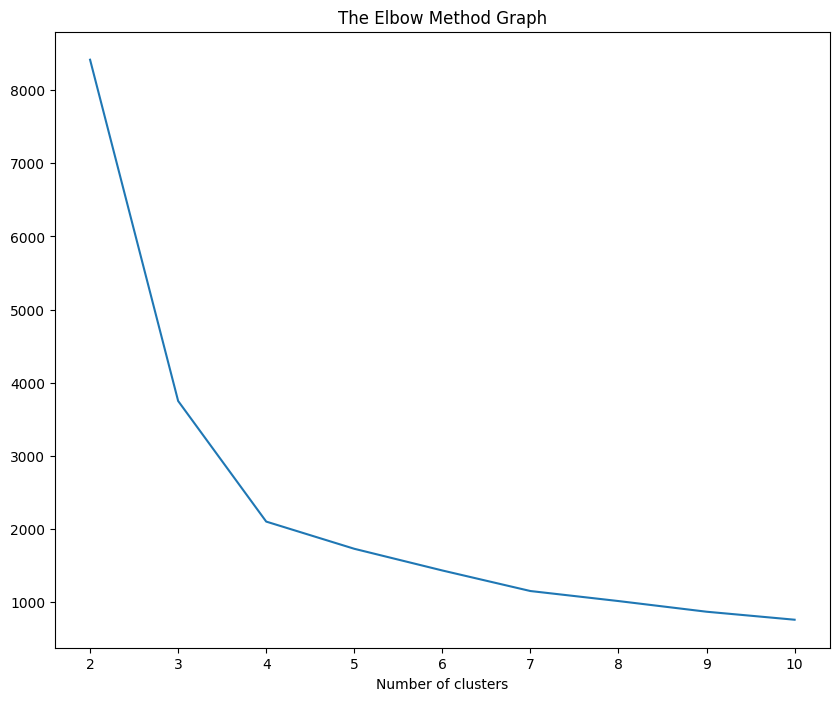

In [ ]:
#lets plot the Elbow
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(range(2,11,1),the_scores)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.xticks(ticks=range(2,11))
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

#calculating the silhouette_score from the sklearn metrics module function silhouette_score
for i in range(2,11):
   kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10,max_iter=50,verbose=0)
   kmeans.fit(RFM_df_scaled)
   silhouette = silhouette_score(RFM_df_scaled,kmeans.labels_)
   print("for {} clusters the silhouette_score is {}".format(i,silhouette))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



for 2 clusters the silhouette_score is 0.9783542923053947
for 3 clusters the silhouette_score is 0.5151949147998822
for 4 clusters the silhouette_score is 0.49520856323814166
for 5 clusters the silhouette_score is 0.4377471146947333
for 6 clusters the silhouette_score is 0.4214062450692421
for 7 clusters the silhouette_score is 0.4293806701505445
for 8 clusters the silhouette_score is 0.43419043619853737
for 9 clusters the silhouette_score is 0.44012209063986407
for 10 clusters the silhouette_score is 0.4071781070567991


In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++',n_init=10,max_iter=50,verbose=0)
kmeans.fit(RFM_df_scaled)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



KMeans(max_iter=50, n_clusters=4, n_init=10)

In [ ]:
RFM_df['Clusters'] = kmeans.labels_

RFM_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score,Clusters
0,12346.0,326,1,77183.60,1,1,4,6,0
1,12747.0,2,9,3489.74,4,4,4,12,3
2,12748.0,1,171,27508.01,4,4,4,12,3
3,12749.0,4,5,4040.88,4,4,4,12,3
4,12820.0,3,4,942.34,4,3,3,10,3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



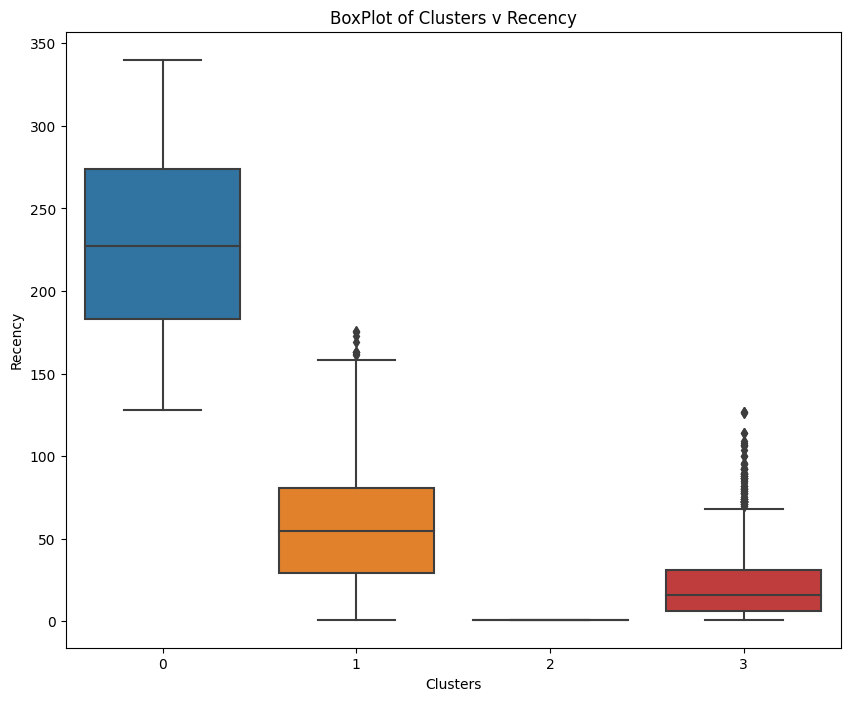

In [ ]:
import seaborn as sns

sns.boxplot( x= 'Clusters',y= 'Recency' ,data=RFM_df)
plt.rcParams["figure.figsize"] = (10,8)
plt.title("BoxPlot of Clusters v Recency")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



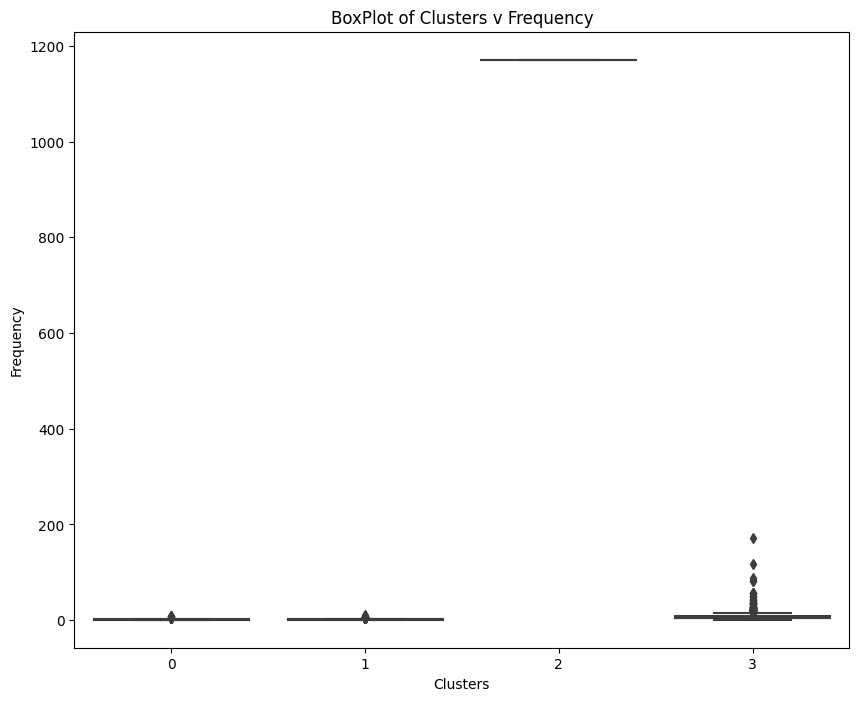

In [ ]:
sns.boxplot( x= 'Clusters',y= 'Frequency' ,data=RFM_df)
plt.rcParams["figure.figsize"] = (10,8)
plt.title("BoxPlot of Clusters v Frequency")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



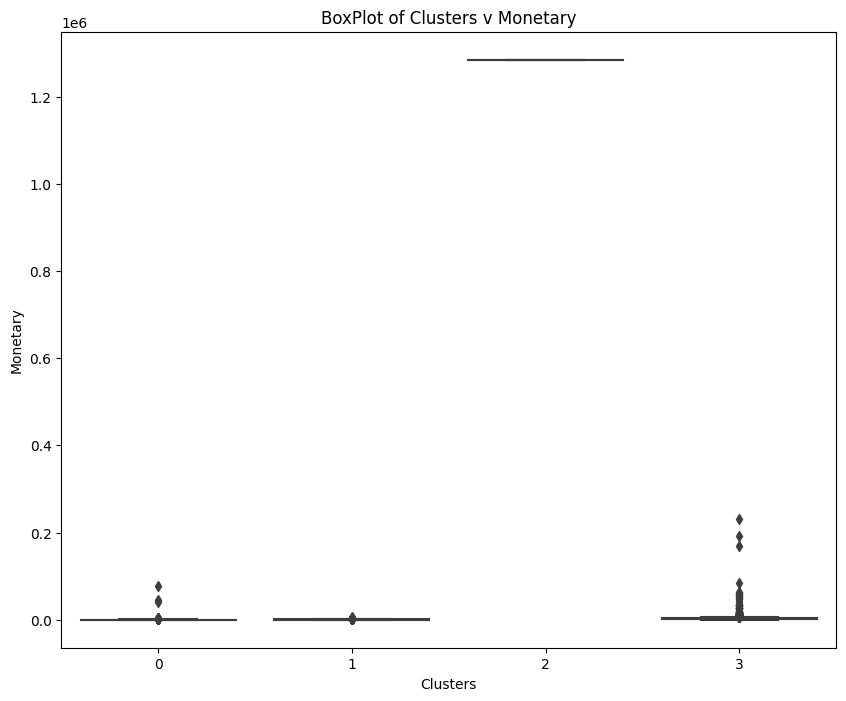

In [ ]:
sns.boxplot( x= 'Clusters',y= 'Monetary' ,data=RFM_df)
plt.rcParams["figure.figsize"] = (10,8)
plt.title("BoxPlot of Clusters v Monetary")
plt.show()

In [ ]:
temp_df = RFM_df[["Clusters","RFM_Score", "Recency", "Frequency", "Monetary"]].groupby("Clusters").agg(["mean"])
temp_df.columns = ["RFM_Score mean", "Recency mean", "Frequency mean", "Monetary mean"]
temp_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,RFM_Score mean,Recency mean,Frequency mean,Monetary mean
Clusters,,,,
0,4.284414,229.723549,1.416382,5.652437e+02
1,6.395129,59.281461,1.817321,5.324039e+02
2,12.000000,1.000000,1171.000000,1.284416e+06
3,10.569263,22.291523,7.836664,3.765053e+03


In [ ]:
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("RFM_Score", "Recency", "Frequency","Monetary"),
                    specs=specs
                    )

fig.add_trace(
    go.Pie(values = temp_df['RFM_Score mean'], labels = temp_df.index,
    name = 'RFM_Score'),
    1, 1
)
fig.add_trace(
    go.Pie(values = temp_df['Recency mean'], labels = temp_df.index,
    name = 'Recency'),
    1, 2
)
fig.add_trace(
    go.Pie(values = temp_df['Frequency mean'], labels = temp_df.index,
    name = 'Frequency'),
    2, 1
)
fig.add_trace(
    go.Pie(values = temp_df['Monetary mean'], labels = temp_df.index,
    name = 'Monetary'),
    2, 2
)
fig.update_layout(height=800, width=1200, title_text=" ")
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
from numpy.lib.arraysetops import unique

product_catalog = list(unique(MBA_df['Description']))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(WOODEN HEART CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.031609,0.029506,0.023198,0.733888,24.872093,0.022265,3.646933,0.991123
1,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.029506,0.031609,0.023198,0.786192,24.872093,0.022265,4.529244,0.988975
2,"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.042913,0.045673,0.032201,0.750383,16.429605,0.030241,3.823164,0.981242
3,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",0.045673,0.042913,0.032201,0.705036,16.429605,0.030241,3.244760,0.984080
4,(GREEN REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.057239,0.035684,0.032201,0.562572,15.765478,0.030158,2.204513,0.993433


In [ ]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         212 non-null    object 
 1   consequents         212 non-null    object 
 2   antecedent support  212 non-null    float64
 3   consequent support  212 non-null    float64
 4   support             212 non-null    float64
 5   confidence          212 non-null    float64
 6   lift                212 non-null    float64
 7   leverage            212 non-null    float64
 8   conviction          212 non-null    float64
 9   zhangs_metric       212 non-null    float64
dtypes: float64(8), object(2)
memory usage: 16.7+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
def remove_from_list(y, item_to_search):
  newlist = list()
  for i in y:
    if i not in item_to_search:
      newlist.append(i)
  return newlist

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
def search_list(item_to_search, list_to_search = rules['antecedents']):

  max_lift = 0
  item_to_recommend = ''
  for i, item in enumerate(list_to_search):
    if set(list(item_to_search)).issubset(set(list(item))):
      if rules['lift'][i] > max_lift:
        max_lift = rules['lift'][i]
        y = list(rules['antecedents'][i])
        x = remove_from_list(y, item_to_search)
        item_to_recommend = list(rules['consequents'][i]) + x
  if item_to_recommend == '':
    pass
    #print("There are no Product recommendations")
  else:
    print(item_to_search)
    return print(f"People who bought this also bought: {item_to_recommend}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
for i in range(len(product_catalog)):
  search_list([product_catalog[i]])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



['60 TEATIME FAIRY CAKE CASES']
People who bought this also bought: ['PACK OF 72 RETROSPOT CAKE CASES']
['ALARM CLOCK BAKELIKE GREEN']
People who bought this also bought: ['ALARM CLOCK BAKELIKE RED']
['ALARM CLOCK BAKELIKE PINK']
People who bought this also bought: ['ALARM CLOCK BAKELIKE RED']
['ALARM CLOCK BAKELIKE RED']
People who bought this also bought: ['ALARM CLOCK BAKELIKE GREEN']
['BUNTING , SPOTTY']
People who bought this also bought: ['PARTY BUNTING']
['CHARLOTTE BAG PINK POLKADOT']
People who bought this also bought: ['RED RETROSPOT CHARLOTTE BAG']
['CHARLOTTE BAG SUKI DESIGN']
People who bought this also bought: ['WOODLAND CHARLOTTE BAG']
['CREAM HANGING HEART T-LIGHT HOLDER']
People who bought this also bought: ['RED HANGING HEART T-LIGHT HOLDER']
['DOLLY GIRL LUNCH BOX']
People who bought this also bought: ['SPACEBOY LUNCH BOX']
['GARDENERS KNEELING PAD CUP OF TEA']
People who bought this also bought: ['GARDENERS KNEELING PAD KEEP CALM']
['GARDENERS KNEELING PAD KEEP CALM

In [ ]:
print(len(product_catalog))

3697


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

